# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

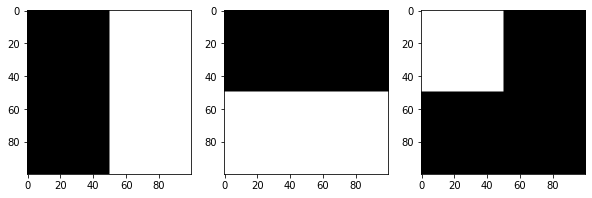

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


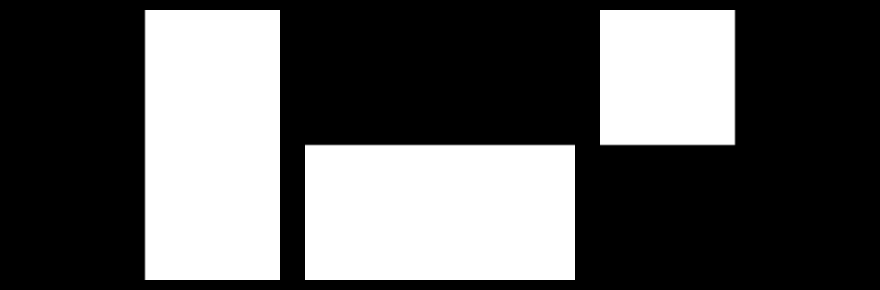

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the patterns
patterns = [
    np.block([[np.zeros((100, 50)), np.ones((100, 50))]]),  
    np.block([[np.zeros((50, 100))], [np.ones((50, 100))]]),  
    np.block([[np.ones((50, 50)), np.zeros((50, 50))], [np.zeros((50, 100))]])# Top-left corner
]


# Plot the corrected patterns
fig, axes = plt.subplots(1, 3, figsize=(9, 3), facecolor='black')

for ax, pattern in zip(axes, patterns):
    ax.imshow(pattern, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()




*   Use the above three images to create the following image

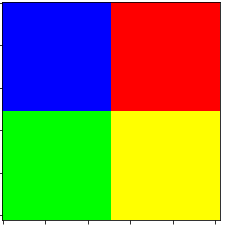
*Hint: Remember channels and color spaces*

In [3]:
# Create the new composite image from the previously defined patterns
from PIL import Image

# Define individual components as PIL images
vertical_split = Image.fromarray((patterns[0] * 255).astype('uint8')).convert('L')
horizontal_split = Image.fromarray((patterns[1] * 255).astype('uint8')).convert('L')
top_left_corner = Image.fromarray((patterns[2] * 255).astype('uint8')).convert('L')

# empty RGB image
composite_image = Image.new("RGB", (100, 100))

# Define color mappings for each pattern
blue = (0, 0, 255)       # Blue
red = (255, 0, 0)        # Red
green = (0, 255, 0)      # Green
yellow = (255, 255, 0)   # Yellow

# Assign colors based on patterns
for x in range(100):
    for y in range(100):
        if vertical_split.getpixel((x, y)) == 255 and horizontal_split.getpixel((x, y)) == 0:
            composite_image.putpixel((x, y), red) # Top-right 
        elif top_left_corner.getpixel((x, y)) == 255:
            composite_image.putpixel((x, y), blue) # Top-left
            
            
        elif vertical_split.getpixel((x, y)) == 255 and horizontal_split.getpixel((x, y)) == 255:
             composite_image.putpixel((x, y), yellow)  # Bottom-right

            
        else:
            # composite_image.putpixel((x, y), yellow)  # Bottom-right
            composite_image.putpixel((x, y), green)

# Display the final composite image
composite_image.show()




### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

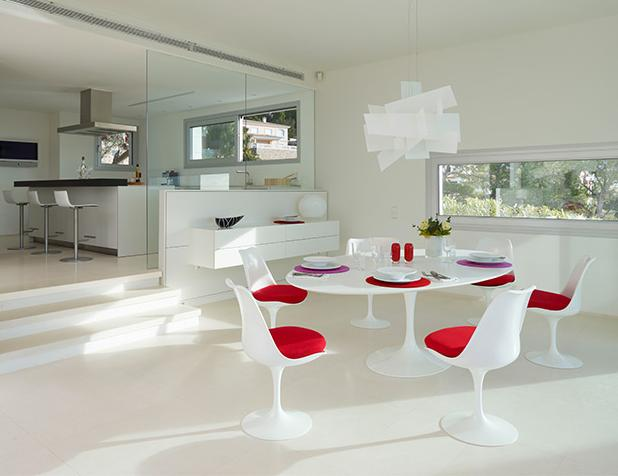

*   Extract individual channels and plot them using matplotlib subplot.



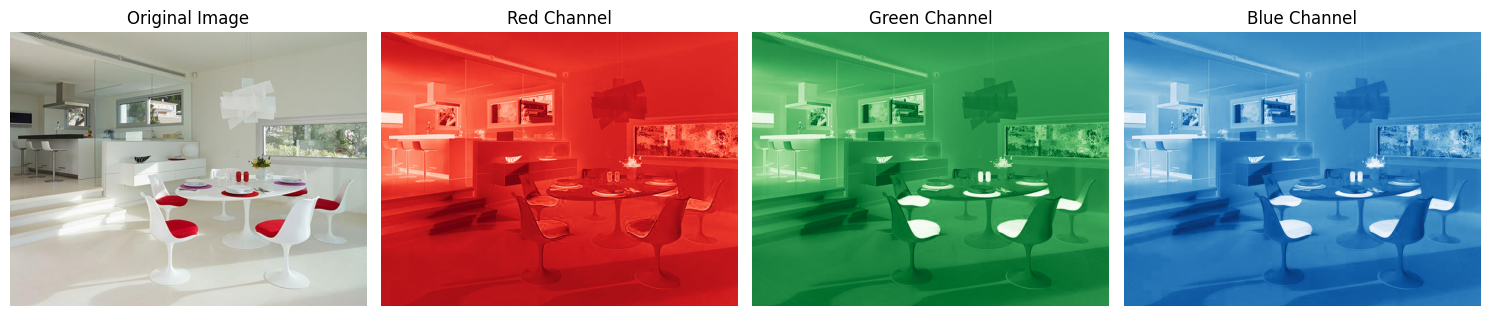

In [4]:
from matplotlib import pyplot as plt
# C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\images\sillas.jpg
# Load a sample JPG image
sample_image_path = r"images\sillas.jpg"

image = Image.open(sample_image_path).convert('RGB')

# Extract individual channels
red_channel, green_channel, blue_channel = image.split()

# Plot the channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the Red channel
axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis("off")

# Display the Green channel
axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis("off")

# Display the Blue channel
axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize  original image and  created image using matplotlib subplot.

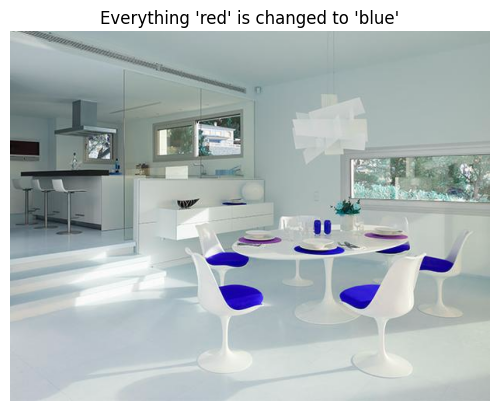

In [5]:
# Open  original image again
image = Image.open(sample_image_path).convert('RGB')

# Convert  image to a numpy array for manipulation
image_array = np.array(image)

# Swap  red and blue channels
# Red is channel 0, Blue is channel 2
image_array[:, :, [0, 2]] = image_array[:, :, [2, 0]]

# Convert back to an image
swapped_image = Image.fromarray(image_array)

# Display  modified image
plt.imshow(swapped_image)
plt.title("Everything 'red' is changed to 'blue'")
plt.axis("off")
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

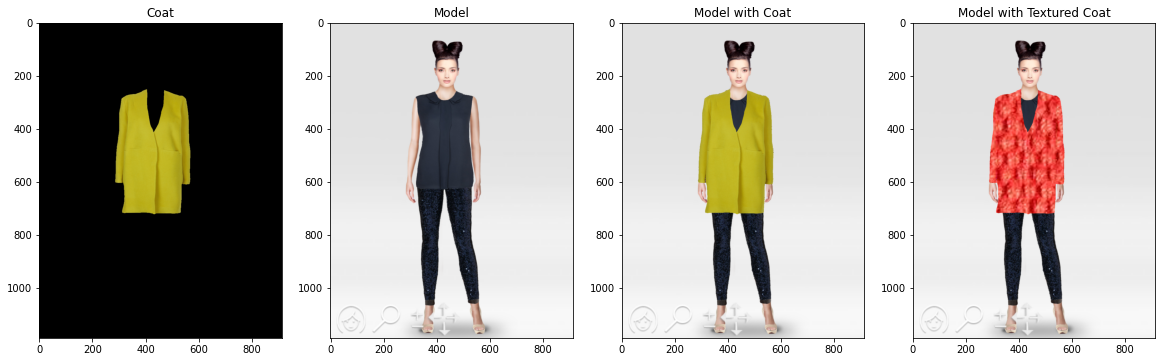

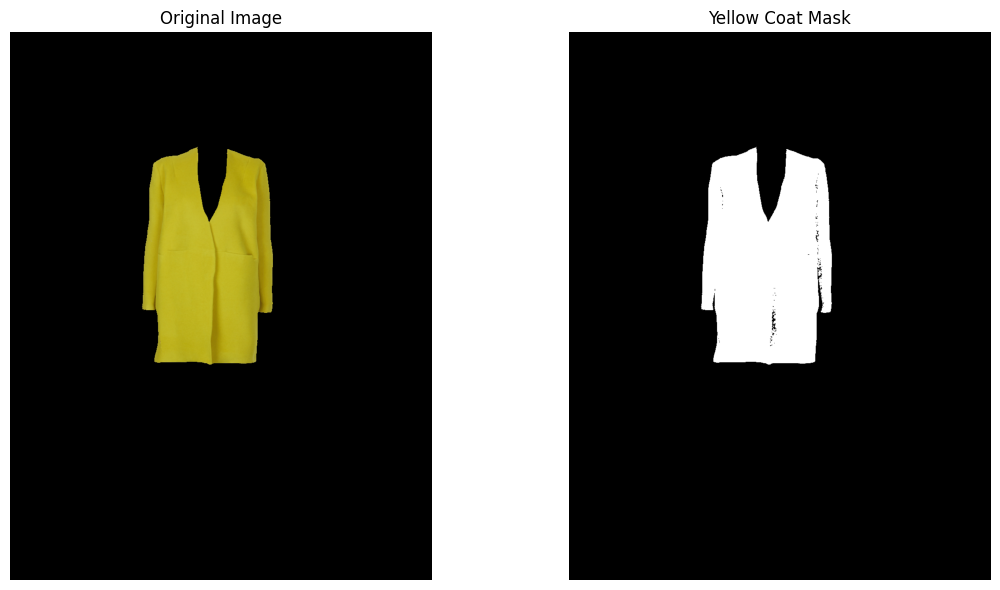

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

# Load the uploaded image and convert it to RGB (remove alpha channel if present)
uploaded_image_path = "images\coat.png"
yellow_coat_image = Image.open(uploaded_image_path).convert('RGB')

# Convert the image to a NumPy array
coat_rgb_array = np.array(yellow_coat_image, dtype=float) / 255.0  # Normalize to [0, 1]

# Convert the RGB image to HSV for color-based masking
coat_hsv = rgb_to_hsv(coat_rgb_array)

# typical HSV values for yellow
yellow_hsv = {
    "hue_min": 0.14,  # Minimum Hue (normalized)
    "hue_max": 0.20,  # Maximum Hue (normalized)
    "saturation_min": 0.4,  # Minimum Saturation (normalized)
    "value_min": 0.5,  # Minimum Value (normalized)
}

yellow_mask = (
    (coat_hsv[:, :, 0] > yellow_hsv["hue_min"]) & (coat_hsv[:, :, 0] < yellow_hsv["hue_max"]) &
    (coat_hsv[:, :, 1] > yellow_hsv["saturation_min"]) &
    (coat_hsv[:, :, 2] > yellow_hsv["value_min"])
)

# Plot the original image and the mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(yellow_coat_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Yellow mask
axes[1].imshow(yellow_mask, cmap='gray')
axes[1].set_title("Yellow Coat Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()


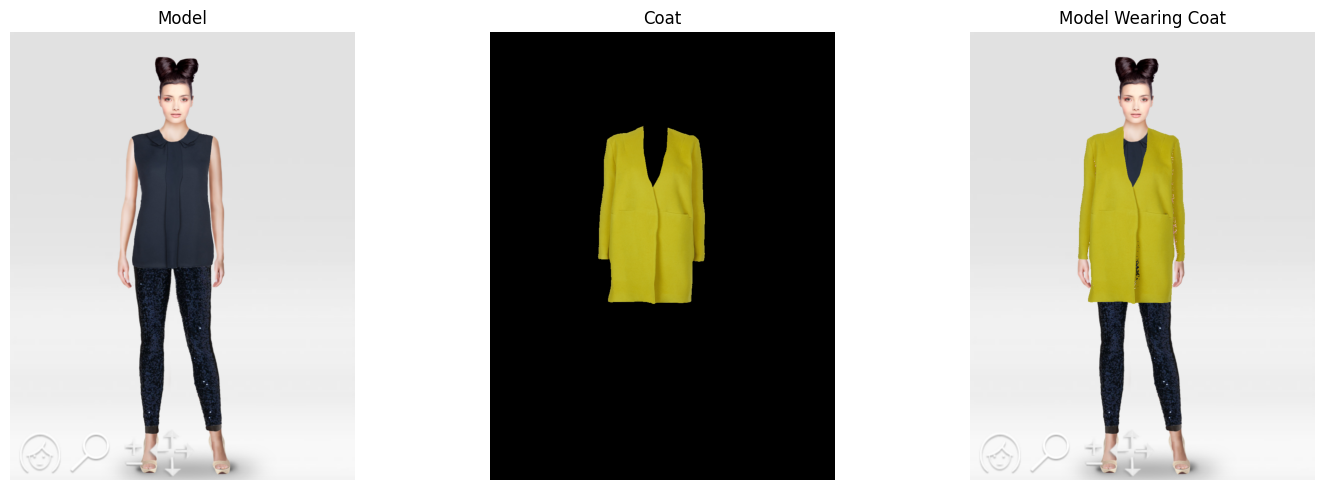

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv


# Load the model image
model_image_path = "images\model.png"
coat_image_path = "images\coat.png"
coat_image = Image.open(coat_image_path).convert("RGBA")
model_image = Image.open(model_image_path).convert("RGBA")


# Resize images to the same dimensions
model_image = model_image.resize(coat_image.size)

# Convert coat image to HSV and create a mask
coat_array = np.array(coat_image)
coat_hsv = rgb2hsv(coat_array[:, :, :3] / 255.0)
yellow_mask = (
    (coat_hsv[:, :, 0] > 0.14) & (coat_hsv[:, :, 0] < 0.20) &
    (coat_hsv[:, :, 1] > 0.4) & (coat_hsv[:, :, 2] > 0.5)
)

# Convert mask to an image
mask_image = Image.fromarray((yellow_mask * 255).astype(np.uint8))

# Composite the images
composite_image = Image.composite(coat_image, model_image, mask_image)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(model_image)
axes[0].set_title("Model")
axes[0].axis("off")

axes[1].imshow(coat_image)
axes[1].set_title("Coat")
axes[1].axis("off")

axes[2].imshow(composite_image)
axes[2].set_title("Model Wearing Coat")
axes[2].axis("off")

plt.tight_layout()
plt.show()




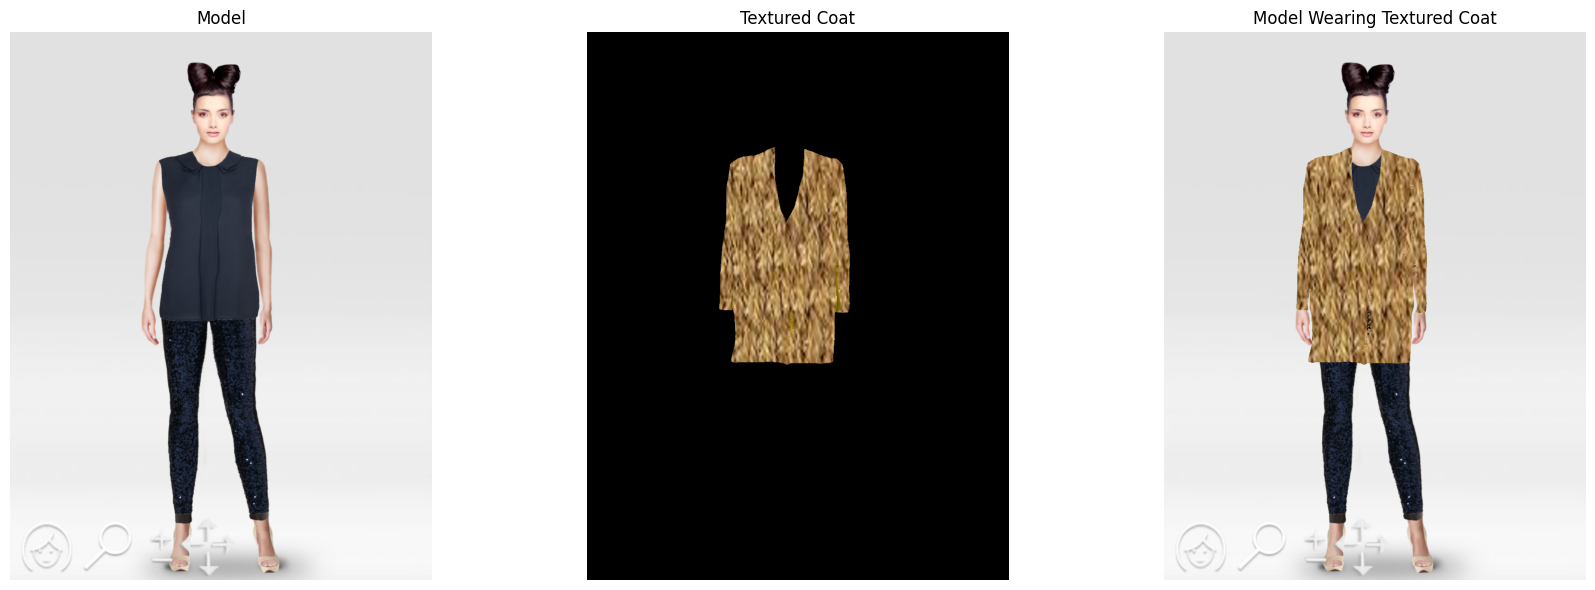

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv

# Load model and coat images
model_image_path = "images/model.png"
coat_image_path = "images/coat.png"
texture_image_path = "images/texture.png"

model_image = Image.open(model_image_path).convert("RGBA")
coat_image = Image.open(coat_image_path).convert("RGBA")
texture_image = Image.open(texture_image_path).resize(coat_image.size).convert("RGBA")

# Resize model to match the coat's dimensions
model_image = model_image.resize(coat_image.size)

# Convert coat to HSV and create a mask for yellow regions
coat_array = np.array(coat_image)
coat_hsv = rgb2hsv(coat_array[:, :, :3] / 255.0)
yellow_mask = (
    (coat_hsv[:, :, 0] > 0.14) & (coat_hsv[:, :, 0] < 0.20) &
    (coat_hsv[:, :, 1] > 0.4) & (coat_hsv[:, :, 2] > 0.5)
)

# Expand the mask to RGBA format
yellow_mask_rgba = np.repeat(yellow_mask[:, :, np.newaxis], 4, axis=2)

# Convert texture to an array
texture_array = np.array(texture_image)

# Replace yellow regions with texture
textured_coat_array = coat_array.copy()
textured_coat_array[yellow_mask_rgba] = texture_array[yellow_mask_rgba]

# Convert back to an image
textured_coat_image = Image.fromarray(textured_coat_array)

# Convert the yellow mask to a single channel for compositing
mask_image = Image.fromarray((yellow_mask * 255).astype(np.uint8))

# Composite the textured coat onto the model
final_image = Image.composite(textured_coat_image, model_image, mask_image)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(model_image)
axes[0].set_title("Model")
axes[0].axis("off")

axes[1].imshow(textured_coat_image)
axes[1].set_title("Textured Coat")
axes[1].axis("off")

axes[2].imshow(final_image)
axes[2].set_title("Model Wearing Textured Coat")
axes[2].axis("off")

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




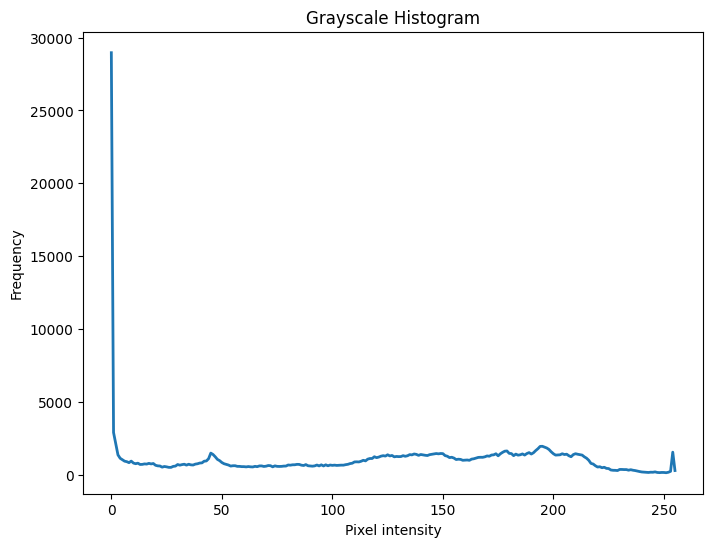

In [21]:
from skimage import io
from skimage.exposure import histogram
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.color import rgb2hsv

astronaut_image_path = r"C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\.venv\Lib\site-packages\skimage\data\astronaut.png"

astronaut_image = Image.open(astronaut_image_path).convert("L")

# Convert the PIL Image to a Numpy array
image_array = np.array(astronaut_image)

# Compute the histogram
hist, hist_centers = histogram(image_array)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.plot(hist_centers, hist, lw=2)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')

plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

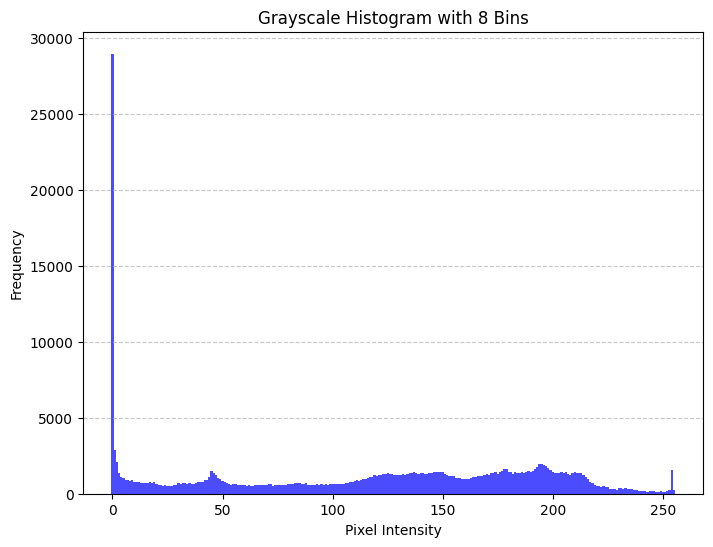

In [22]:
from skimage.exposure import histogram
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


astronaut_image_path = r"C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\.venv\Lib\site-packages\skimage\data\astronaut.png"
astronaut_image = Image.open(astronaut_image_path).convert("L")

image_array = np.array(astronaut_image)

# Compute the histogram with 8 bins
hist, hist_centers = histogram(image_array, nbins=8)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(hist_centers, hist, width=(hist_centers[1] - hist_centers[0]), align="center", alpha=0.7, color="blue")
plt.title("Grayscale Histogram with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()






*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**
Fewer Bins (8 bins): The histogram becomes coarser, aggregating more intensity levels into each bin. With fewer bins it can seem that the image has less variety in intensity levels than it actually does.

More Bins (256 bins): The histogram becomes more detailed, with each bin representing a smaller range of intensity levels. There is more information on the distribution, like as identifying peaks or gaps that represent specific intensity ranges.

The correct bin count depends on the application and required detail: fewer bins (e.g., 8–16) are suitable for broad intensity patterns, while more bins (e.g., 64–256) are better for precise tasks like edge detection. High dynamic range images benefit from more bins, whereas low-contrast images may require fewer. For visualization, fewer bins simplify interpretation, while technical tasks like histogram equalization often need higher bin counts. A common starting point is 256 bins for grayscale images, adjusted based on image size and analysis detail.


A low bin count aggregates broad intensity ranges, simplifying the histogram but losing detail. Subtle variations and small peaks in intensity are smoothed, potentially causing distinct regions to appear as one and leading to oversimplification in tasks like segmentation. The simplified histogram is easier to interpret and useful for understanding general trends, such as whether an image is mostly dark or bright. 

When the Bin Count is Very High
A high bin count captures fine intensity variations, making the histogram more precise but harder to interpret due to excessive detail. Noise can create clutter, but the granularity is ideal for precision tasks like contrast enhancement or edge detection. This allows for better identification of intensity thresholds and enhances advanced image processing.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


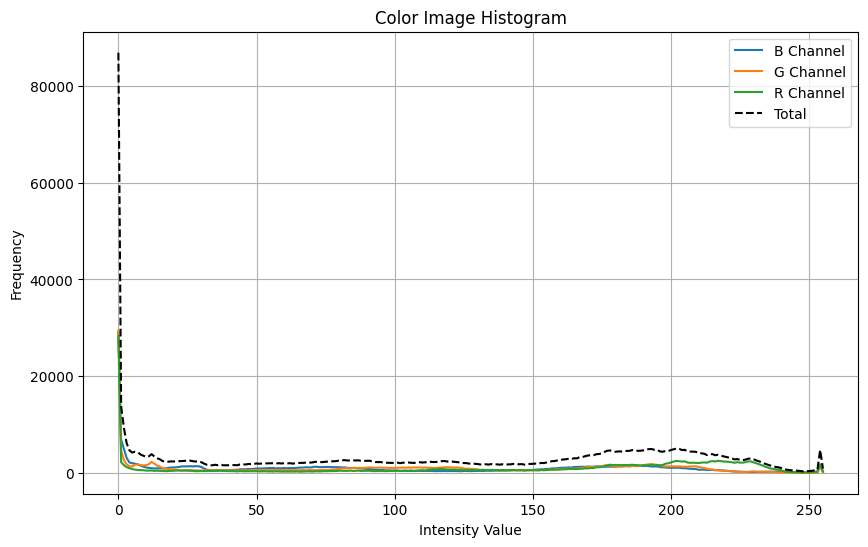

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

astronaut_image_path = r"C:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\.venv\Lib\site-packages\skimage\data\astronaut.png"

image = cv2.imread(astronaut_image_path)

# Calculate histograms for each channel
colors = ('b', 'g', 'r')  # OpenCV loads images in BGR format
histograms = {}

# Compute histogram for each channel
for i, color in enumerate(colors):
    histograms[color] = cv2.calcHist([image], [i], None, [256], [0, 256])

# Calculate the total histogram
total_histogram = sum(histograms[color] for color in colors)

# Plot histograms
plt.figure(figsize=(10, 6))

# Plot each channel's histogram
for color in colors:
    plt.plot(histograms[color], label=f'{color.upper()} Channel')

# Plot the total histogram
plt.plot(total_histogram, label='Total', color='black', linestyle='--')

# Customize plot
plt.title('Color Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()




### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



True


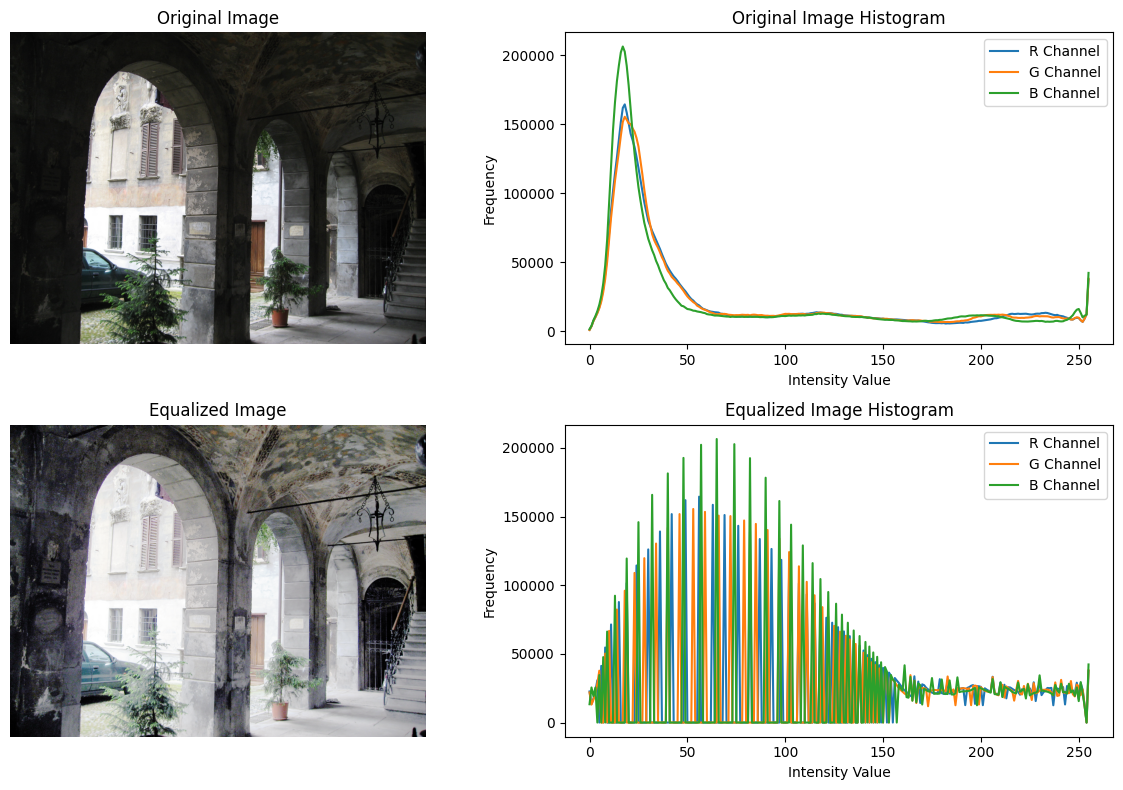

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

aquatermi_lowcontrast_image_path = r"images\aquatermi_lowcontrast.jpg"
# print(os.path.exists(aquatermi_lowcontrast_image_path))

image = cv2.imread(aquatermi_lowcontrast_image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Perform histogram equalization on each channel
equalized_image = np.zeros_like(image_rgb)
for i in range(3):  # Iterate over R, G, B channels
    equalized_image[..., i] = exposure.equalize_hist(image_rgb[..., i]) * 255

equalized_image = equalized_image.astype(np.uint8)

# Compute histograms
def compute_histogram(image, channels=('r', 'g', 'b')):
    histograms = {}
    for i, color in enumerate(channels):
        histograms[color] = cv2.calcHist([image], [i], None, [256], [0, 256])
    return histograms

original_histograms = compute_histogram(image_rgb)
equalized_histograms = compute_histogram(equalized_image)

# Plot original and equalized images and their histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Histogram of original image
for color, hist in original_histograms.items():
    axes[0, 1].plot(hist, label=f"{color.upper()} Channel")
axes[0, 1].set_title("Original Image Histogram")
axes[0, 1].set_xlabel("Intensity Value")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].legend()

# Equalized image
axes[1, 0].imshow(equalized_image)
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")

# Histogram of equalized image
for color, hist in equalized_histograms.items():
    axes[1, 1].plot(hist, label=f"{color.upper()} Channel")
axes[1, 1].set_title("Equalized Image Histogram")
axes[1, 1].set_xlabel("Intensity Value")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].legend()

plt.tight_layout()
plt.show()





*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization is a non-linear technique that redistributes intensities based on the image's histogram to enhance contrast adaptively. It aims to flatten the histogram	
Linear Contrast Stretch applies a Linear or uniform scaling, depending on min and max values. It aims to produce a scaled version of the input histogram

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\lab-computer-vision\.venv\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


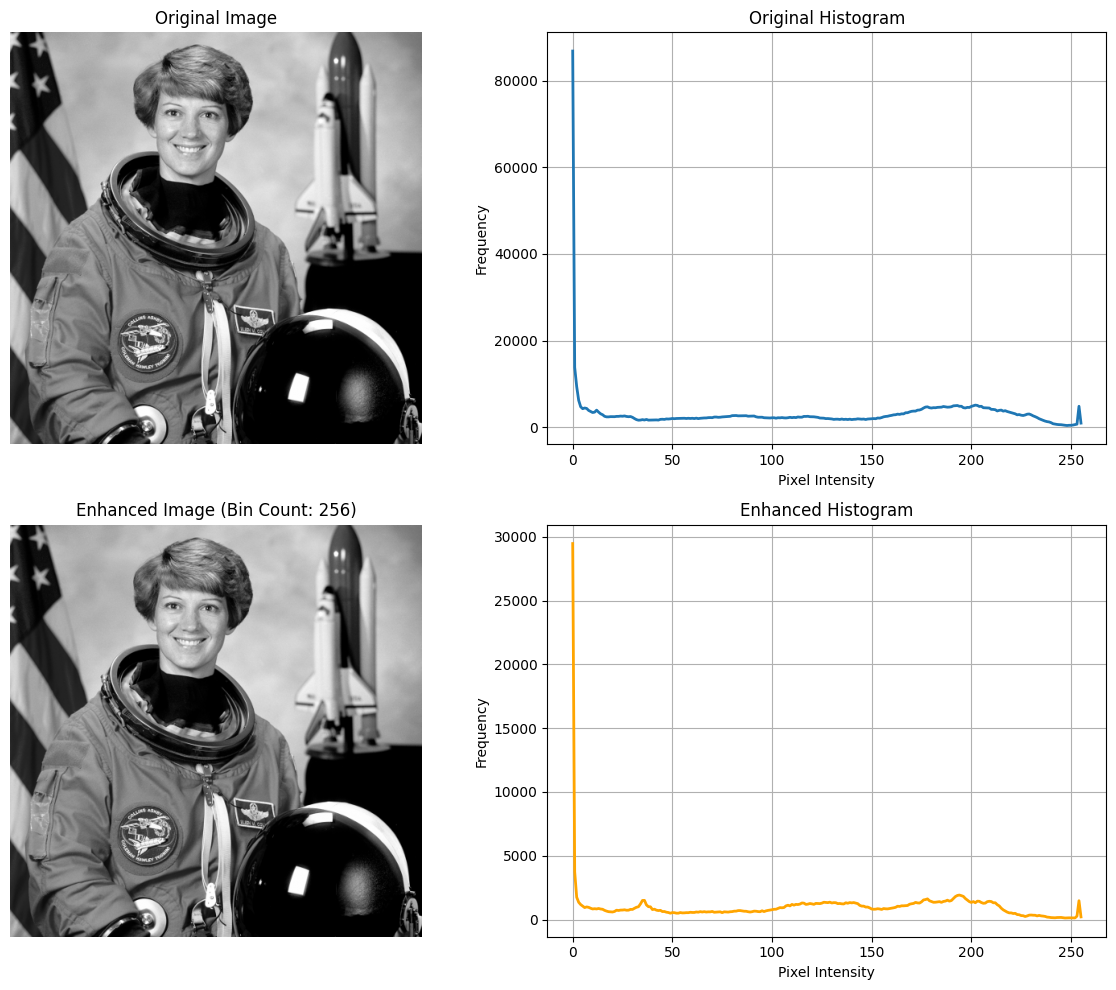

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from PIL import Image
from skimage.color import rgb2gray


def linear_contrast_stretch(image, bin_count=256):
    """
    Perform linear contrast stretching on a grayscale image based on a specified bin count.

    Parameters:
        image (np.ndarray): Input grayscale image as a NumPy array.
        bin_count (int): Number of intensity bins (default: 256).

    Returns:
        np.ndarray: Contrast-stretched image as a NumPy array.
    """
    # Validate the input image
    if not isinstance(image, np.ndarray):
        raise ValueError("Input image must be a NumPy array.")
    if image.ndim != 2:
        raise ValueError("Input image must be a 2D grayscale image.")
    
    # Validate the bin count
    if bin_count < 2:
        raise ValueError("Bin count must be at least 2.")
    
    # Convert the image to float for computation
    image = np.asarray(image, dtype=np.float32)
    
    # Get the minimum and maximum pixel values
    img_min = np.min(image)
    img_max = np.max(image)

    # Handle the edge case where all pixel values are the same
    if img_max == img_min:
        print("Warning: All pixel values are the same. Returning a constant image.")
        return np.full_like(image, img_min, dtype=np.uint8)
    
    # Compute the target intensity range based on the bin count
    target_min = 0
    target_max = bin_count - 1

    # Apply linear contrast stretching
    stretched_image = (image - img_min) / (img_max - img_min)  # Normalize to [0, 1]
    stretched_image = stretched_image * (target_max - target_min) + target_min  # Scale to target range

    # Clip values and convert back to uint8
    stretched_image = np.clip(stretched_image, target_min, target_max).astype(np.uint8)
    
    return stretched_image


astronaut_image = data.astronaut()
# Convert to grayscale
grayscale_image = rgb2gray(astronaut_image)

# Convert the PIL Image to a NumPy array
image_array = np.array(astronaut_image)

# Apply linear contrast stretching
bin_count = 256
enhanced_image = linear_contrast_stretch(grayscale_image * 255, bin_count=bin_count)

# Compute histograms
original_hist, original_hist_centers = histogram(image_array)
enhanced_hist, enhanced_hist_centers = histogram(enhanced_image)

# Create a 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
axes[0, 0].imshow(grayscale_image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Original Histogram
axes[0, 1].plot(original_hist_centers, original_hist, lw=2)
axes[0, 1].set_title("Original Histogram")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(True)

# Enhanced Image
axes[1, 0].imshow(enhanced_image, cmap="gray")
axes[1, 0].set_title(f"Enhanced Image (Bin Count: {bin_count})")
axes[1, 0].axis("off")

# Enhanced Histogram
axes[1, 1].plot(enhanced_hist_centers, enhanced_hist, lw=2, color="orange")
axes[1, 1].set_title("Enhanced Histogram")
axes[1, 1].set_xlabel("Pixel Intensity")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




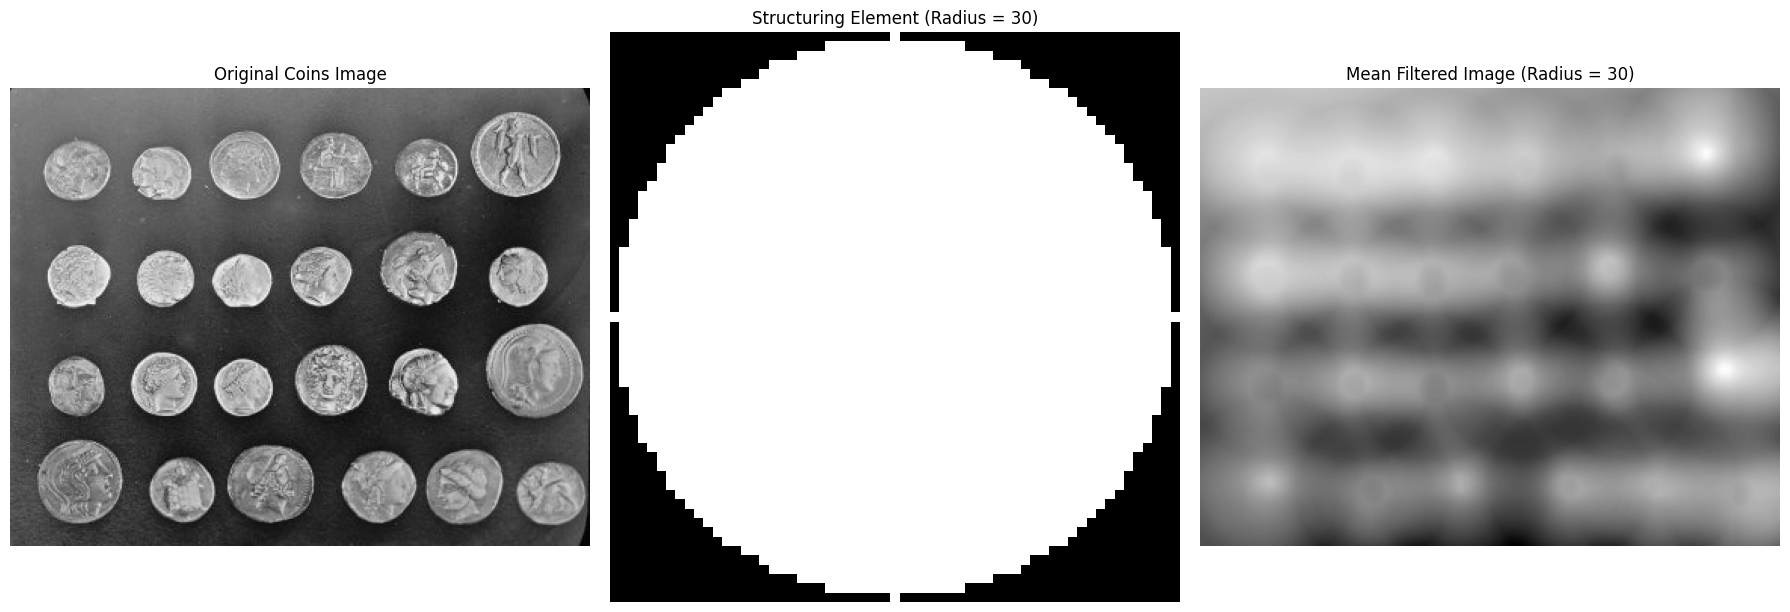

In [55]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.filters import rank

# Load the "coins" image
coins_image = data.coins()

# Define a disk structuring element with a radius of 20
selem = disk(radius=20)

# Increase the radius by 10
increased_selem = disk(radius=30)

# Apply the mean filter with the increased structuring element
filtered_image = rank.mean(coins_image, footprint=increased_selem)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original coins image
axes[0].imshow(coins_image, cmap="gray")
axes[0].set_title("Original Coins Image")
axes[0].axis("off")

# Increased structuring element visualization
axes[1].imshow(increased_selem, cmap="gray")
axes[1].set_title("Structuring Element (Radius = 30)")
axes[1].axis("off")

# Filtered image
axes[2].imshow(filtered_image, cmap="gray")
axes[2].set_title("Mean Filtered Image (Radius = 30)")
axes[2].axis("off")

plt.tight_layout()
plt.show()





*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\dbigman\AppData\Local\Temp\ipykernel_5500\2304999721.py:11: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": square(20),
C:\Users\dbigman\AppData\Local\Temp\ipykernel_5500\2304999721.py:12: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": rectangle(20, 10),


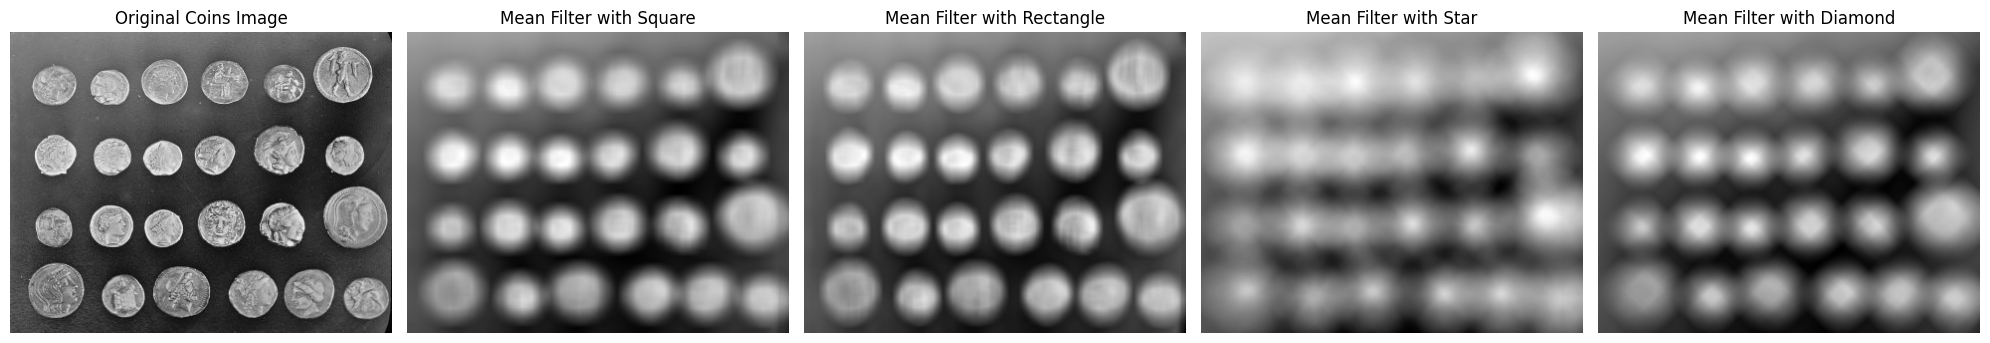

In [61]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk, square, rectangle, diamond, star
from skimage.filters import rank

# Load the "coins" image
coins_image = data.coins()

# Define different structuring elements
selems = {
    "Square": square(20),
    "Rectangle": rectangle(20, 10),
    "Star": star(20),
    "Diamond": diamond(20),
}

# Apply mean filter with different structuring elements
filtered_images = {name: rank.mean(coins_image, footprint=selem) for name, selem in selems.items()}

# Plot the results
fig, axes = plt.subplots(1, len(selems) + 1, figsize=(20, 8))

# Original image
axes[0].imshow(coins_image, cmap="gray")
axes[0].set_title("Original Coins Image")
axes[0].axis("off")

# Filtered images
for ax, (name, filtered_image) in zip(axes[1:], filtered_images.items()):
    ax.imshow(filtered_image, cmap="gray")
    ax.set_title(f"Mean Filter with {name}")
    ax.axis("off")

plt.tight_layout()
plt.show()




*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

The radius of the disk structuring element determines the size of the "neighborhood" used for smoothing. A smaller radius has more details and edges, providing localized smoothing with less noise reduction. A larger radius smooths over larger regions, reducing noise significantly but potentially losing detail. The choice of radius depends on the application, balancing detail preservation with noise reduction, and larger radii may be more complicated computationally. 
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Structuring elements influence smoothing by changing the shape and directionality of the neighborhood. Symmetric elements like disks and squares provide uniform smoothing, while asymmetric elements like rectangles and stars introduce directional effects, emphasizing specific orientations. The structuring element depends on the image and the desired outcome, like preserving circular features or enhancing textures.
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The mean filter replaces each pixel’s value with the average value of its neighbors, resulting in smoothing by reducing sharp transitions. It is computationally simple and effectively reduces random noise but may blur edges. 

The Gaussian filter uses a weighted average of the neighboring pixels, giving more importance to those closer to the center based on a Gaussian function. It smooths images while preserving edges better than a mean filter, thanks to its localized weighting. 



Mean filters are commonly used in preprocessing for low-complexity noise reduction in images.
Gaussian filters are preferred for tasks requiring noise reduction with minimal edge distortion, like preprocessing for computer vision.
...